In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Solución Sistemas de Ecuaciones No Lineales

##### Definimos los sistemas de ecuaciones

In [107]:
G=(lambda x,y: np.log(x**2 + y**2)-np.sin(x*y)-np.log(2)-np.log(np.pi), \
   lambda x,y: np.exp(x-y)+np.cos(x*y))

H=(lambda x,y,z: 6*x-2*np.cos(y*z)-1, \
   lambda x,y,z: 9*y+np.sqrt(x**2 + np.sin(z) + 1.06) + 0.9, \
   lambda x,y,z: 60*z + 3 *np.exp(x*y*(-1)) + 10*np.pi - 3)

len(G)

2

## Método descenso del gradiente

In [46]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    if dim==2:
        for i in range(dim):
            v[i] = G[i](r[0],r[1])
    elif dim==3:
        for i in range(dim):
            v[i] = G[i](r[0],r[1],r[2])
    return v

In [47]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    if dim==2:
        for i in range(dim):
            J[i,0] = (  G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]) )/(2*h)
            J[i,1] = (  G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h) )/(2*h)
    
    elif dim==3:
        for i in range(dim):
            J[i,0] = (  G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)
            J[i,1] = (  G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)
            J[i,2] = (  G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return J.T

In [48]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [80]:
def GetFig2(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [50]:
def GetFig3(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y','Z']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [100]:
def GetSolve(G,r,lr=1e-5,epochs=int(1e5),error=1e-7):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        
        J = GetJacobian(G,r)
        
        GVector = GetVectorF(G,r)
        
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        
        R_vector = np.vstack((R_vector,r))
        
        NewF = GetMetric(G,r)
        
        
        Vector_F = np.append(Vector_F,NewF)
        
        d = np.abs( CurrentF - NewF )/NewF
        
        
        if it%500 == 0:
            
            #print(it,d)
            clear_output(wait=True)
            if len(G)==2:
                GetFig2(Vector_F,R_vector,it)
                time.sleep(0.01)
            elif len(G)==3:
                GetFig3(Vector_F,R_vector,it)
                time.sleep(0.01)
            
        it += 1
        
    if d < error:
        print(' Entrenamiento completo en iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

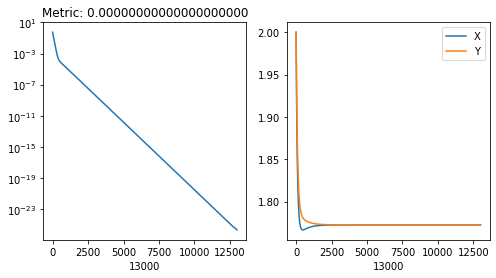

 Entrenamiento completo en iteraciones 13218


In [101]:
xsol,it,F,R = GetSolve(G,[2,2],lr=1e-3)

In [102]:
print('La solución del sistema G es:\n',xsol)

La solución del sistema G es:
 [1.77245385 1.77245385]


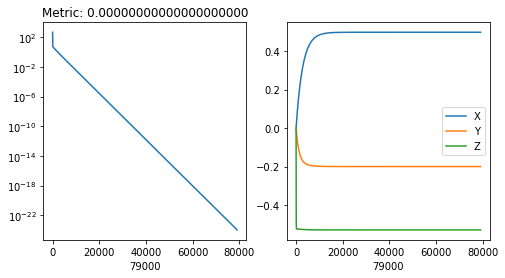

 Entrenamiento completo en iteraciones 79061


In [103]:
xsol,it,F,R = GetSolve(H,[0,0,0],lr=1e-5)

In [104]:
print('La solución del sistema H es:\n',xsol)

La solución del sistema H es:
 [ 0.49814468 -0.1996059  -0.52882598]


## Método Newton-Raphson

In [86]:
def NewtonRaphson(G,r,error=1e-10):
    
    it = 0
    d = 1
    Vector_d = np.array([])
    
    while d > error:
        
        it += 1
        
        rc = r
        
        F = GetVectorF(G,r)
        J = GetJacobian(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot( InvJ, F )
        
        diff = r - rc
        
        d = np.linalg.norm(diff)
        
        Vector_d = np.append( Vector_d , d )
        
    return r,it,Vector_d

In [105]:
r,it,distancias = NewtonRaphson(G,[2,2])
print('Solución del sistema G es:\n',r,'\nEncontrada en',it,'iteraciones')

Solución del sistema G es:
 [1.77245385 1.77245385] 
Encontrada en 109 iteraciones


In [106]:
r,it,distancias = NewtonRaphson(H,[0,0,0])
print('Solución del sistema H es:\n',r,'\nEncontrada en',it,'iteraciones')

Solución del sistema H es:
 [ 0.49814468 -0.1996059  -0.52882598] 
Encontrada en 12 iteraciones
